Audio[WARNING]: Modifying input wav from size 58741 to 58752
Audio[INFO]: change in number of samples: 11 [should be less than hop length: 64]
/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
Audio[INFO]: a.to_rms size: 919, reduction factor 918.0


Syllables for 1_0004

,syl,start,stop,kssid,audio
0,0,0.00000,0.09288,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
1,그,0.09288,0.24152,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
2,애,0.24152,0.33564,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
3,0,0.33564,0.35846,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
4,전,0.35846,0.56929,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
5,~ᆫ화,0.56929,0.67854,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
6,번,0.67854,0.84911,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
7,~ᆫ호,0.84911,0.89335,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
8,알,0.89335,1.07737,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
9,아?,1.07737,1.27282,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav


Silence only rows for 1_0004

,syl,start,stop,kssid,audio
0,0,0.00000,0.09288,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
3,0,0.33564,0.35846,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav
10,0,1.27282,1.33200,1_0004,./data/korean-single-speaker/kss/1/1_0004.wav


.is_speech

(919,)

._speech_bools

(919,)

Audio[INFO]: a.to_rms size: 919, reduction factor 918.0
No handles with labels found to put in legend.


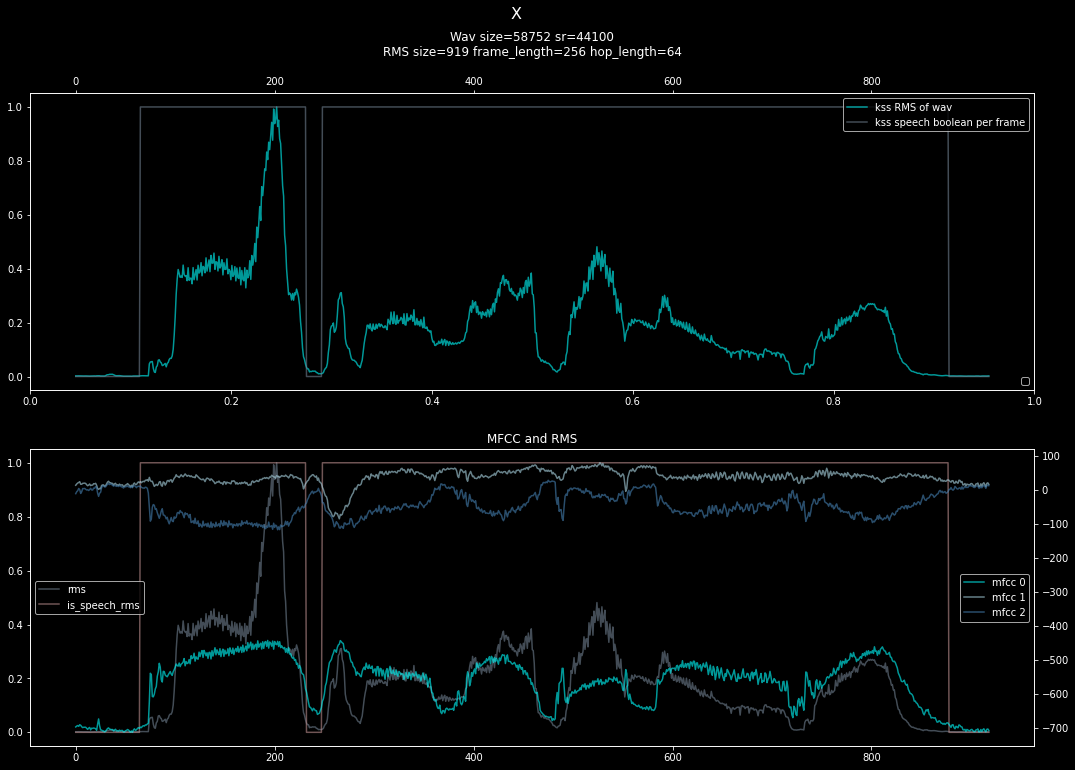

Equality Test (should be True)

True

In [3]:
import matplotlib.pyplot as plt
from audio import Audio
from display import Disp
from kss_df import KssDf
from kss_speech import KssSpeech
from transformers import SlidingWindow

disp = Disp(display)
plt.style.use('dark_background')

# data_dir = 'data/korean-single-speaker/kss/1'
kss_id = '1_0004'
# kss_file_part = f'{data_dir}/{kss_id}'
# audio_path_ = f'{kss_file_part}.wav'
kdf = KssDf(kss_id)

# Create Audio object
a = Audio(kdf.audio_path, n_fft=256, n_hops=4, n_mfcc=3)

# Create DF from TextGrid data
syls_df = kdf.load_csv()
disp.obj(syls_df, f'Syllables for {kss_id}')
disp.obj(syls_df[syls_df['syl'] == '0'], f'Silence only rows for {kss_id}')

kspeech = KssSpeech(syls_df, a)
disp.obj(kspeech.is_speech.shape, '.is_speech')
disp.obj(kspeech._speech_bools.shape, '._speech_bools')
# Convert DF to values matching wav and rms size
is_speech_wav = a.speech_from_interval(syls_df, missing_val=False)
old_speech_rms = a.to_rms(is_speech_wav.astype(float)).squeeze()
# is_speech_rms = kspeech.is_speech

# plotting
fig, (ax1, ax2)  = plt.subplots(2, 1, figsize=(18,12))
fig.suptitle('X', fontsize=16)

ax1.set_title(f'Wav size={a.size} sr={a.sr}\nRMS size={len(a.rms.squeeze())} frame_length={a.n_fft} hop_length={a.hop_length}\n')
# ax1.plot(a.wav, color='slategray', alpha=0.6, label='wav')
# ax1.plot(is_speech_wav, color='rosybrown', alpha=0.6, label='is speech')

ax1a = ax1.twiny()
ax1a.plot(a.rms.squeeze(), color='cyan', alpha=0.6, label='kss RMS of wav')
ax1a.plot(kspeech.is_speech, color='slategray', alpha=0.6, label='kss speech boolean per frame')
ax1.legend(loc='lower right')
ax1a.legend(loc='upper right')

ax2.set_title(f'MFCC and RMS')
ax2.plot(a.rms.squeeze(), color='slategray', alpha=0.6, label='rms')
ax2.plot(kspeech.is_speech, color='rosybrown', alpha=0.6, label='is_speech_rms')
ax2.legend(loc='center left')

ax2a = ax2.twinx()
ax2a.plot(a.mfcc[0], color='cyan', alpha=0.6, label='mfcc 0')
ax2a.plot(a.mfcc[1], color='lightblue', alpha=0.6, label='mfcc 1')
ax2a.plot(a.mfcc[2], color='steelblue', alpha=0.6, label='mfcc 2')
ax2a.legend(loc='center right')

plt.show()

kspeech2 = KssSpeech(syls_df, a)
disp.obj(kspeech == kspeech2, label="Equality Test (should be True)")